# **Electric Vehicle (EV) Market Segmentation Project**

### **– Problem Formulation (Questions)**

- *Which type of EV should the company produce?*  
- *Who are the target customers (age, gender, income, profession, location)?*  
- *Which cities/states are best to start the EV market?*  
- *What price range will attract early adopters?*  


In [2]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Datasets

EV_df = pd.read_csv("/content/EV_Dataset.csv")

In [4]:
EV_df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
29744,2019.0,apr,4/1/2019,Maharashtra,MOTOR CAR,4-Wheelers,4W_Personal,4.0
29745,2019.0,apr,4/1/2019,Maharashtra,MOTORISED CYCLE (CC > 25CC),2-Wheelers,2W_Personal,4.0
29746,2019.0,apr,4/1/2019,Maharashtra,PRIVATE SERVICE VEHICLE,Others,Others,0.0
29747,2019.0,apr,4/1/2019,Maharashtra,PRIVATE SERVICE VEHICLE (INDIVIDUAL USE),Others,Others,0.0


In [5]:
EV_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29749 entries, 0 to 29748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               29749 non-null  float64
 1   Month_Name         29749 non-null  object 
 2   Date               29748 non-null  object 
 3   State              29748 non-null  object 
 4   Vehicle_Class      29748 non-null  object 
 5   Vehicle_Category   29748 non-null  object 
 6   Vehicle_Type       29748 non-null  object 
 7   EV_Sales_Quantity  29748 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1.8+ MB


In [6]:
EV_df.isnull().sum()

,0
Year,0
Month_Name,0
Date,1
State,1
Vehicle_Class,1
Vehicle_Category,1
Vehicle_Type,1
EV_Sales_Quantity,1


In [7]:
EV_df=EV_df.dropna(subset=['EV_Sales_Quantity'])

In [8]:
EV_df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
29743,2019.0,apr,4/1/2019,Maharashtra,MOTOR CAB,4-Wheelers,4W_Shared,16.0
29744,2019.0,apr,4/1/2019,Maharashtra,MOTOR CAR,4-Wheelers,4W_Personal,4.0
29745,2019.0,apr,4/1/2019,Maharashtra,MOTORISED CYCLE (CC > 25CC),2-Wheelers,2W_Personal,4.0
29746,2019.0,apr,4/1/2019,Maharashtra,PRIVATE SERVICE VEHICLE,Others,Others,0.0


In [9]:
EV_df.isnull().sum()

,0
Year,0
Month_Name,0
Date,0
State,0
Vehicle_Class,0
Vehicle_Category,0
Vehicle_Type,0
EV_Sales_Quantity,0


In [10]:
EV_df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [11]:
EV_df.describe()

,Year,EV_Sales_Quantity
count,29748.000000,29748.000000
mean,2018.422247,30.617252
std,2.925959,379.198487
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2018.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,17780.000000


In [12]:
#  Aggregations

# Yearly sales by Vehicle Category
agg_year_category = EV_df.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()
agg_year_category

,Year,Vehicle_Category,EV_Sales_Quantity
0,2014.0,2-Wheelers,647.0
1,2014.0,3-Wheelers,6.0
2,2014.0,4-Wheelers,134.0
3,2014.0,Bus,3.0
4,2014.0,Others,85.0
5,2015.0,2-Wheelers,457.0
6,2015.0,3-Wheelers,16.0
7,2015.0,4-Wheelers,227.0
8,2015.0,Bus,2.0
9,2015.0,Others,51.0


In [13]:
# Sales by State and Vehicle Type

agg_state_type = EV_df.groupby(['State', 'Vehicle_Type'])['EV_Sales_Quantity'].sum().reset_index()
agg_state_type

,State,Vehicle_Type,EV_Sales_Quantity
0,Andaman & Nicobar Island,2W_Personal,3.0
1,Andaman & Nicobar Island,2W_Shared,0.0
2,Andaman & Nicobar Island,3W_Goods,0.0
3,Andaman & Nicobar Island,3W_Goods_LowSpeed,29.0
4,Andaman & Nicobar Island,3W_Personal,0.0
...,...,...,...
363,West Bengal,4W_Personal,742.0
364,West Bengal,4W_Shared,294.0
365,West Bengal,Bus,36.0
366,West Bengal,Institution Bus,0.0


In [14]:
# Total sales by State

agg_state = EV_df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
agg_state

,State,EV_Sales_Quantity
0,Andaman & Nicobar Island,82.0
1,Andhra Pradesh,23189.0
2,Arunachal Pradesh,13.0
3,Assam,35943.0
4,Bihar,51646.0
5,Chandigarh,2737.0
6,Chhattisgarh,18367.0
7,DNH and DD,136.0
8,Delhi,76944.0
9,Goa,4397.0


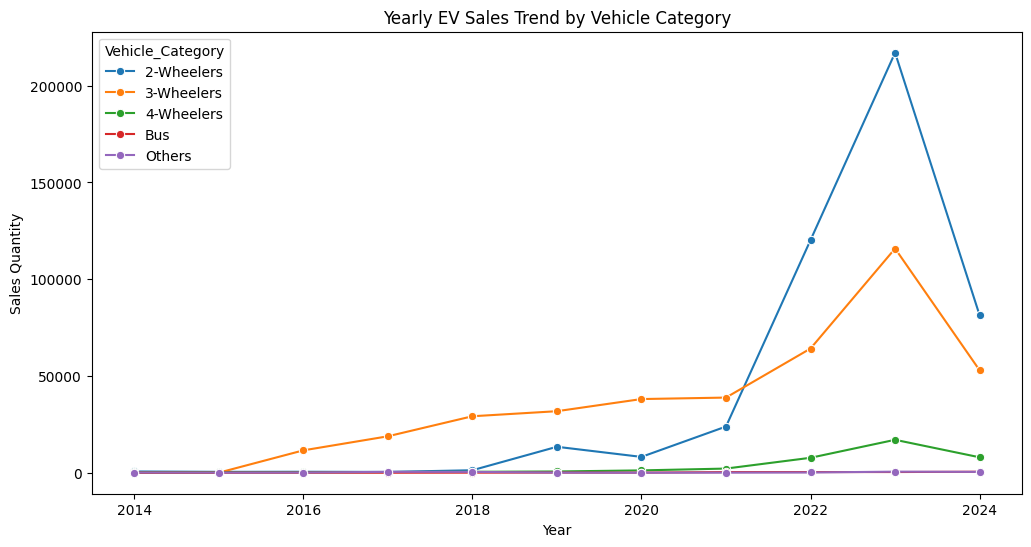

In [15]:
# Visualization


# Yearly sales trend by vehicle category

plt.figure(figsize=(12,6))
sns.lineplot(data=agg_year_category, x='Year', y='EV_Sales_Quantity', hue='Vehicle_Category', marker='o')
plt.title('Yearly EV Sales Trend by Vehicle Category')
plt.xlabel('Year')
plt.ylabel('Sales Quantity')
plt.show()


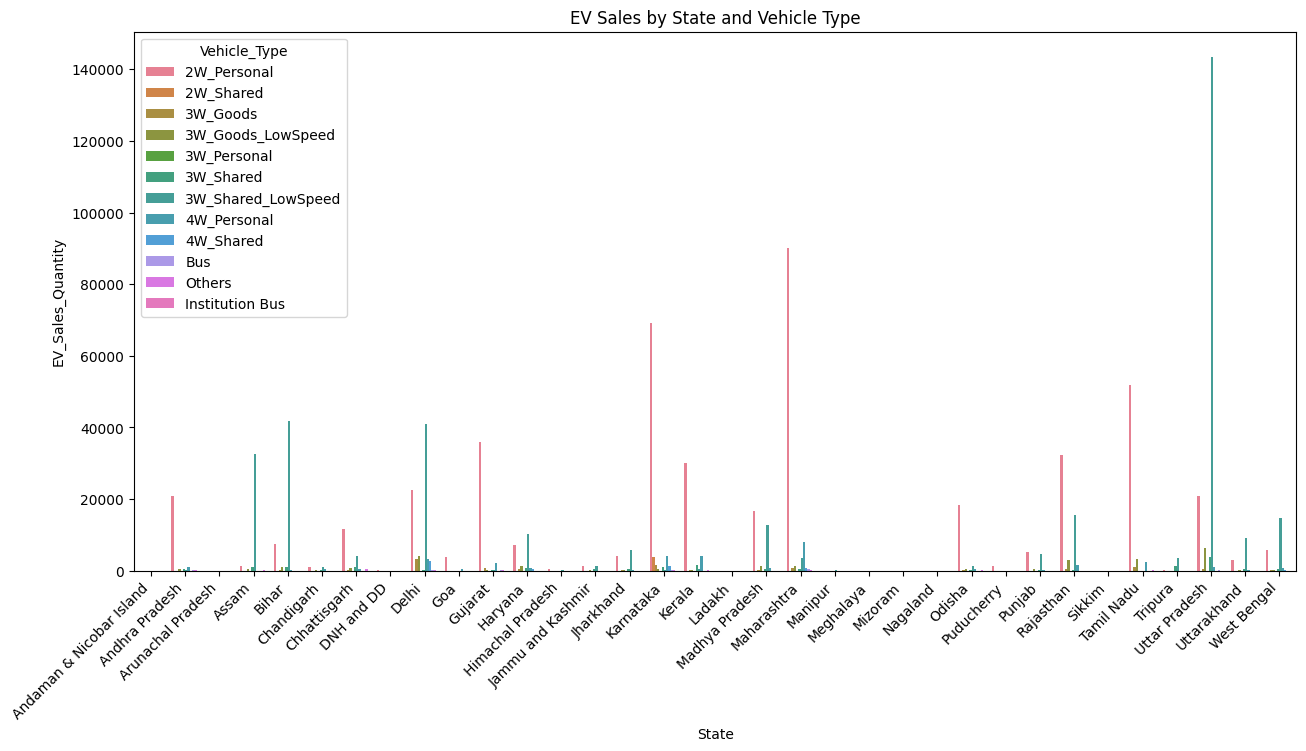

In [16]:
# Bar plot by state and vehicle type

plt.figure(figsize=(15,7))
sns.barplot(data=agg_state_type, x='State', y='EV_Sales_Quantity', hue='Vehicle_Type')
plt.xticks(rotation=45, ha='right')
plt.title('EV Sales by State and Vehicle Type')
plt.show()

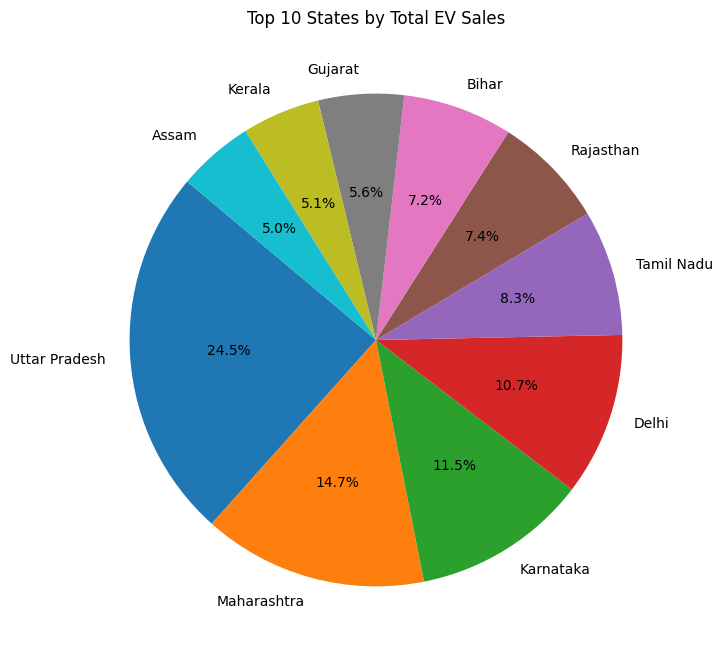

In [17]:
# Pie chart: Top 10 states by total sales

top_states = agg_state.sort_values(by='EV_Sales_Quantity', ascending=False).head(10)
plt.figure(figsize=(8,8))
plt.pie(top_states['EV_Sales_Quantity'], labels=top_states['State'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 States by Total EV Sales')
plt.show()

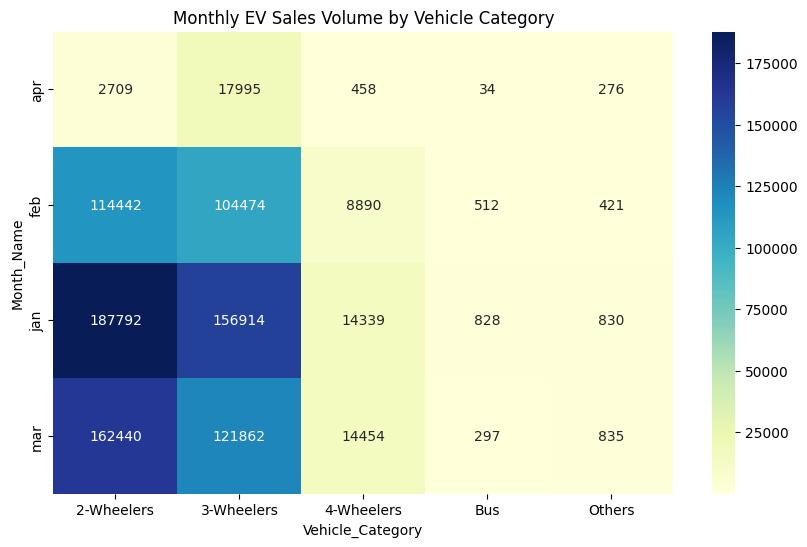

In [18]:
# Heatmap sales by Month and Category

pivot_table = EV_df.pivot_table(index='Month_Name', columns='Vehicle_Category', values='EV_Sales_Quantity', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Monthly EV Sales Volume by Vehicle Category')
plt.show()


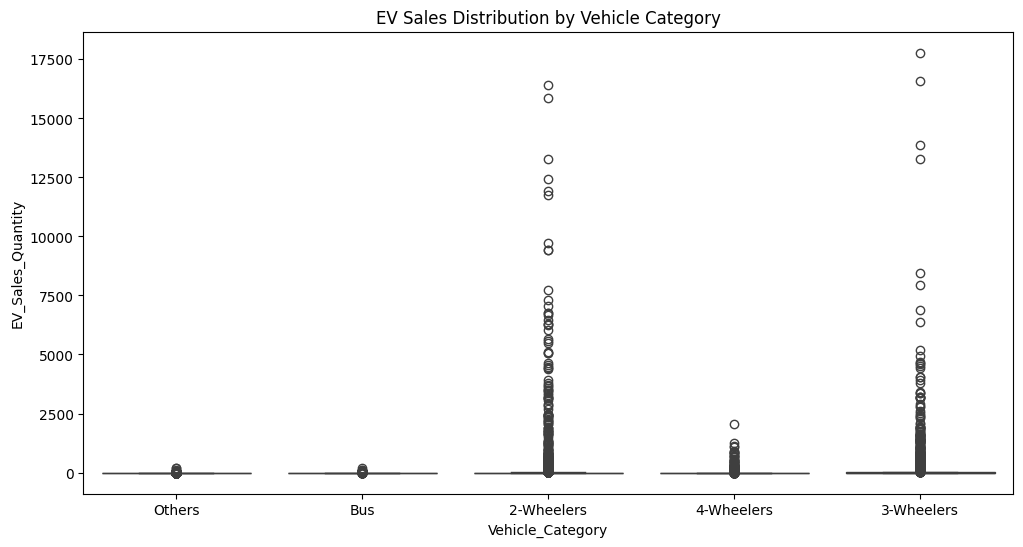

In [19]:
# Boxplot to show sales distribution and outliers

plt.figure(figsize=(12,6))
sns.boxplot(data=EV_df, x='Vehicle_Category', y='EV_Sales_Quantity')
plt.title('EV Sales Distribution by Vehicle Category')
plt.show()

In [20]:
# Outlier Detection

q1 = EV_df['EV_Sales_Quantity'].quantile(0.25)
q3 = EV_df['EV_Sales_Quantity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = EV_df[(EV_df['EV_Sales_Quantity'] < lower_bound) | (EV_df['EV_Sales_Quantity'] > upper_bound)]
print("Number of outliers:", len(outliers))
print(outliers[['State', 'Vehicle_Category', 'EV_Sales_Quantity']])

Number of outliers: 3964
                State Vehicle_Category  EV_Sales_Quantity
13     Andhra Pradesh       2-Wheelers                1.0
102      Chhattisgarh       2-Wheelers               10.0
153             Delhi       2-Wheelers                2.0
157             Delhi       4-Wheelers                5.0
173               Goa       4-Wheelers                1.0
...               ...              ...                ...
29740     Maharashtra       2-Wheelers              575.0
29742     Maharashtra       2-Wheelers               92.0
29743     Maharashtra       4-Wheelers               16.0
29744     Maharashtra       4-Wheelers                4.0
29745     Maharashtra       2-Wheelers                4.0

[3964 rows x 3 columns]


/tmp/ipython-input-4080972176.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return EV_df.groupby(group_col).apply(filter_group).reset_index(drop=True)


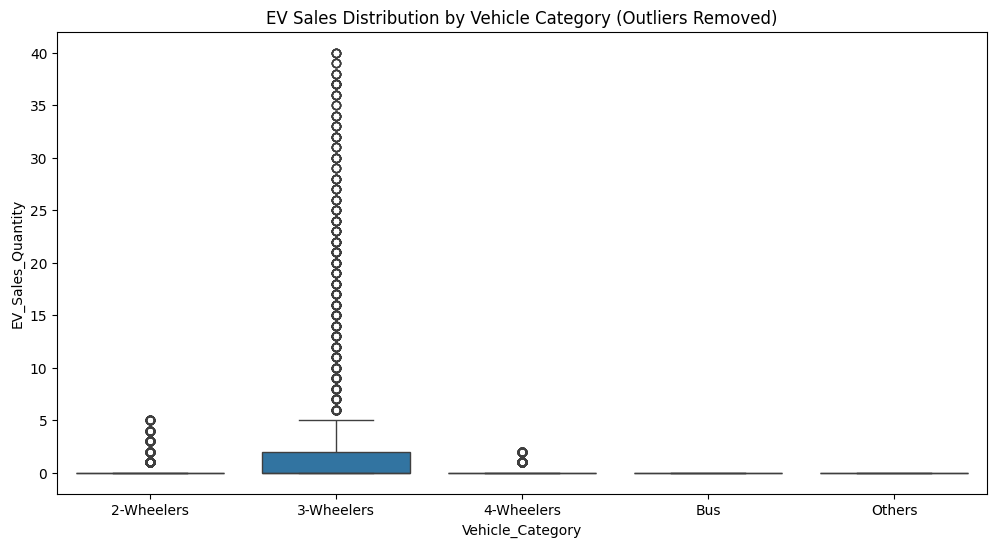

In [21]:
# Function to remove outliers based on IQR for each category

def remove_outliers_iqr(df, group_col, value_col):
    def filter_group(group):
        Q1 = group[value_col].quantile(0.25)
        Q3 = group[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return group[(group[value_col] >= lower) & (group[value_col] <= upper)]

    return EV_df.groupby(group_col).apply(filter_group).reset_index(drop=True)

# Remove outliers by Vehicle_Category
df_clean = remove_outliers_iqr(EV_df, 'Vehicle_Category', 'EV_Sales_Quantity')

# Plot boxplot on cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Vehicle_Category', y='EV_Sales_Quantity')
plt.title('EV Sales Distribution by Vehicle Category (Outliers Removed)')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans



# Encode categorical columns

categorical_cols = ['Vehicle_Category', 'State', 'Vehicle_Class', 'Vehicle_Type', 'Month_Name']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    EV_df[col] = le.fit_transform(EV_df[col])
    label_encoders[col] = le

/tmp/ipython-input-1683564218.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EV_df[col] = le.fit_transform(EV_df[col])
/tmp/ipython-input-1683564218.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EV_df[col] = le.fit_transform(EV_df[col])
/tmp/ipython-input-1683564218.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [23]:
# Select features for clustering

features = ['Vehicle_Category', 'State', 'Vehicle_Class', 'Vehicle_Type', 'Month_Name', 'EV_Sales_Quantity']
X = EV_df[features]


In [24]:
# Standardize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

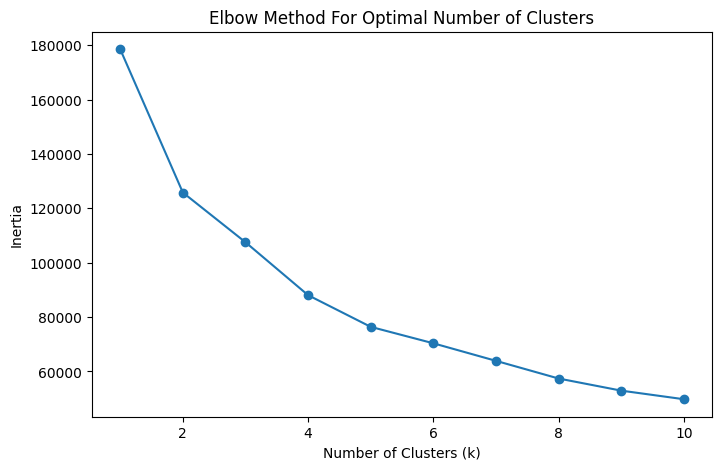

In [25]:
# Use Elbow method to find optimal number of clusters

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/tmp/ipython-input-862914673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EV_df['Cluster'] = kmeans.fit_predict(X_scaled)


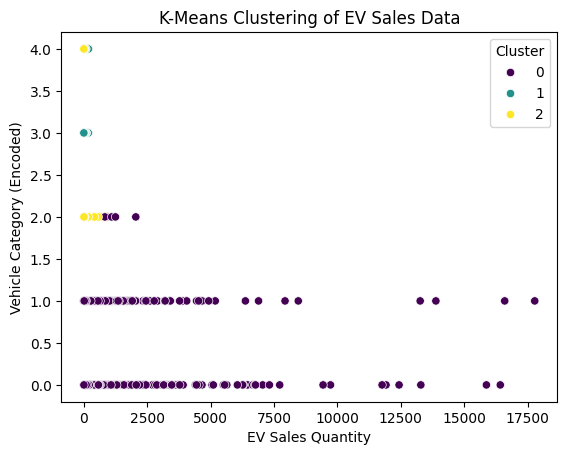

In [26]:
# From the elbow plot, choose number of clusters, e.g., k=3

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
EV_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters with scatter plot using EV_Sales_Quantity and Vehicle_Category

sns.scatterplot(x=EV_df['EV_Sales_Quantity'], y=EV_df['Vehicle_Category'], hue=EV_df['Cluster'], palette='viridis')
plt.title('K-Means Clustering of EV Sales Data')
plt.xlabel('EV Sales Quantity')
plt.ylabel('Vehicle Category (Encoded)')
plt.show()

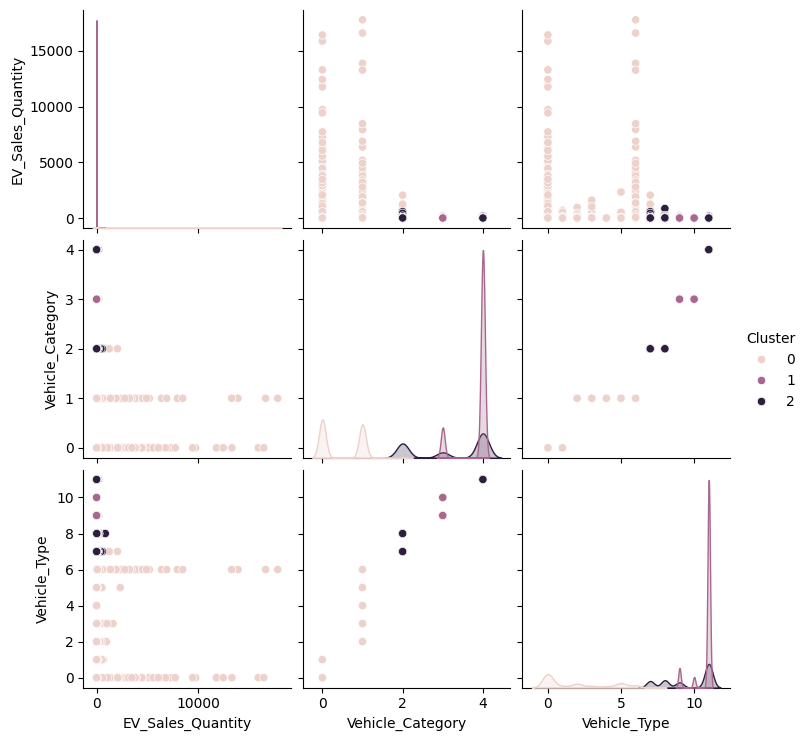

In [27]:
sns.pairplot(EV_df, hue='Cluster', vars=['EV_Sales_Quantity', 'Vehicle_Category', 'Vehicle_Type'])
plt.show()

In [28]:
cluster_summary = EV_df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

                Year  Month_Name      State  Vehicle_Class  Vehicle_Category  \
Cluster                                                                        
0        2018.690228    1.721854  16.815921      40.856197          0.467360   
1        2018.412498    1.725445  17.365490      15.638924          3.872495   
2        2018.193932    1.698328  16.893994      50.858080          3.228483   

         Vehicle_Type  EV_Sales_Quantity  
Cluster                                   
0            1.907420         118.499797  
1           10.789898           0.239246  
2            9.628483           3.790341  
